This program is a duplicate of a program that was created and writted by @josephlee94 on github. It is an implementation of a Deep Learning In which it builds and trains a neural network.
link: https://github.com/josephlee94/intuitive-deep-learning

In [1]:
"""
Name: Karolina Kukula Smoter

Description: This program is a duplicate of a program that 
was created and writted by @josephlee94 on github.
It is an implementation of a Deep Learning in which 
it builds and trains a neural network.
link: https://github.com/josephlee94/intuitive-deep-learning

Instructor: Professor Morovati
Class: CIS2532
Section: NET02
Assignment #: 11
Date: 12/04/2022
"""
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [3]:
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


In [4]:
#Looking at an individual image.
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [5]:
#Seeing the image as an image.
import matplotlib.pyplot as plt
%matplotlib inline

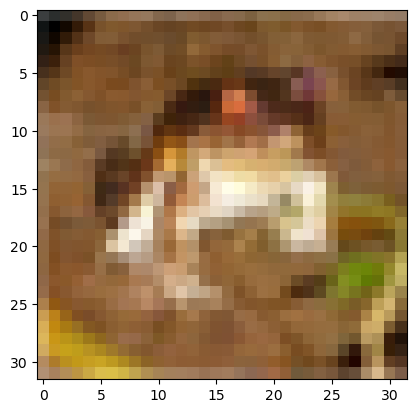

In [6]:
img = plt.imshow(x_train[0])

In [7]:
#Displaying the label.
print('The label is:', y_train[0])

The label is: [6]


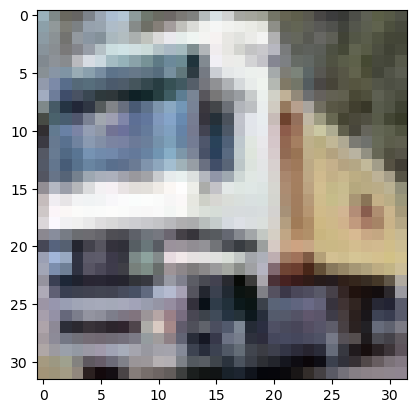

In [8]:
#Looking at the second image.
img = plt.imshow(x_train[1])

In [9]:
#Displaying the label.
print('The label is:', y_train[1])

The label is: [9]


In [10]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [11]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [13]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [14]:
#Building and training the CNN. 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [15]:
#Adding to the model layer by layer.
model = Sequential()

2022-12-02 18:17:02.088701: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

In [17]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [18]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [19]:
model.add(Dropout(0.25))

In [20]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [21]:
model.add(Flatten())

In [22]:
model.add(Dense(512, activation='relu'))

In [23]:
model.add(Dropout(0.5))

In [24]:
model.add(Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 138s 110ms/step - loss: 1.5210 - accuracy: 0.4469 - val_loss: 1.1352 - val_accuracy: 0.5869
Epoch 2/20
1250/1250 [==============================] - 142s 114ms/step - loss: 1.1223 - accuracy: 0.6040 - val_loss: 0.9740 - val_accuracy: 0.6514
Epoch 3/20
1250/1250 [==============================] - 146s 117ms/step - loss: 0.9629 - accuracy: 0.6627 - val_loss: 0.8619 - val_accuracy: 0.6953
Epoch 4/20
1250/1250 [==============================] - 148s 118ms/step - loss: 0.8558 - accuracy: 0.7012 - val_loss: 0.8063 - val_accuracy: 0.7137
Epoch 5/20
1250/1250 [==============================] - 85s 68ms/step - loss: 0.7913 - accuracy: 0.7229 - val_loss: 0.7720 - val_accuracy: 0.7299
Epoch 6/20
1250/1250 [==============================] - 81s 64ms/step - loss: 0.7240 - accuracy: 0.7456 - val_loss: 0.7141 - val_accuracy: 0.7520
Epoch 7/20
1250/1250 [==============================] - 82s 66ms/step - loss: 0.6860 - accuracy: 0.7573 - val_loss: 

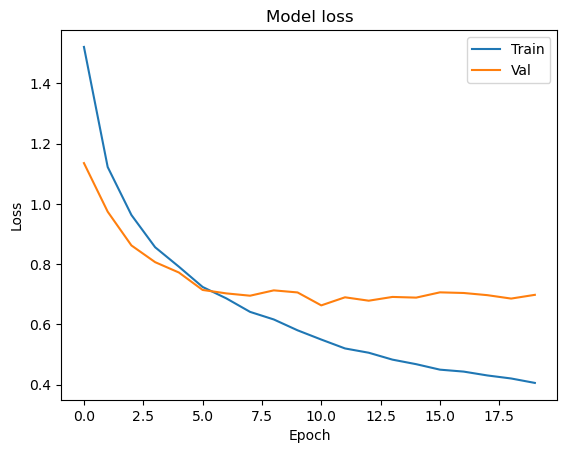

In [28]:
#Visualizing the model using matplotlib.
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [30]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 6s 18ms/step - loss: 0.7188 - accuracy: 0.7717


0.7717000246047974

In [31]:
model.save('my_cifar10_model.h5')